# 03 - Exploratory Data Analysis

In [17]:
# Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from adjustText import adjust_text


In [18]:
# Read in Data
df = pd.read_csv(r"/Users/emmanuel/Documents/Portfolio Projects/FA_Player_Development_Model/data/processed/Feature_Engineered.csv").drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_key_or_id        22 non-null     object 
 1   Player                  22 non-null     object 
 2   season                  22 non-null     object 
 3   Primary_Squad           22 non-null     object 
 4   Playing Time_Min        22 non-null     int64  
 5   gls_per90               22 non-null     float64
 6   ast_per90               22 non-null     float64
 7   xg_per90                22 non-null     float64
 8   xag_per90               22 non-null     float64
 9   npxg_per90              22 non-null     float64
 10  prgC_per90              22 non-null     float64
 11  prgP_per90              22 non-null     float64
 12  prgR_per90              22 non-null     float64
 13  gls_per90_t1            22 non-null     float64
 14  gls_per90_t2            22 non-null     floa

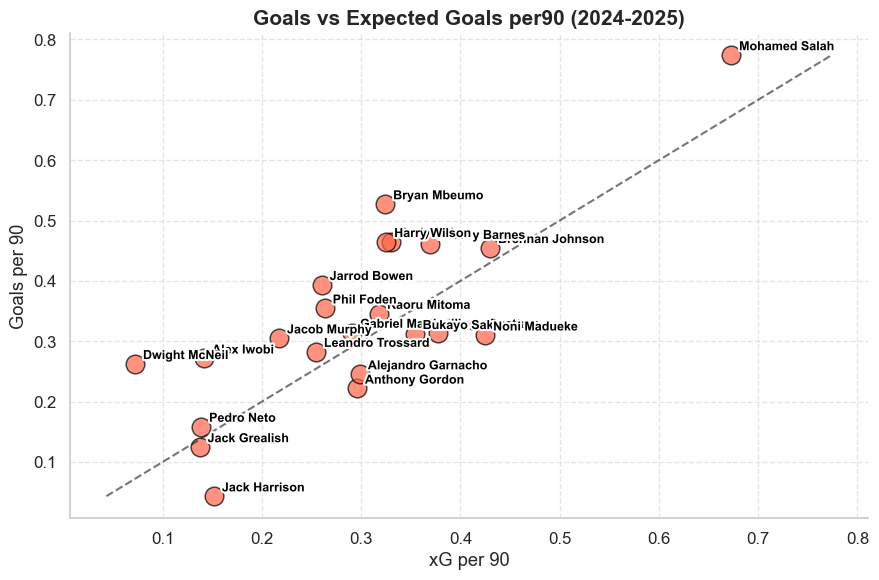

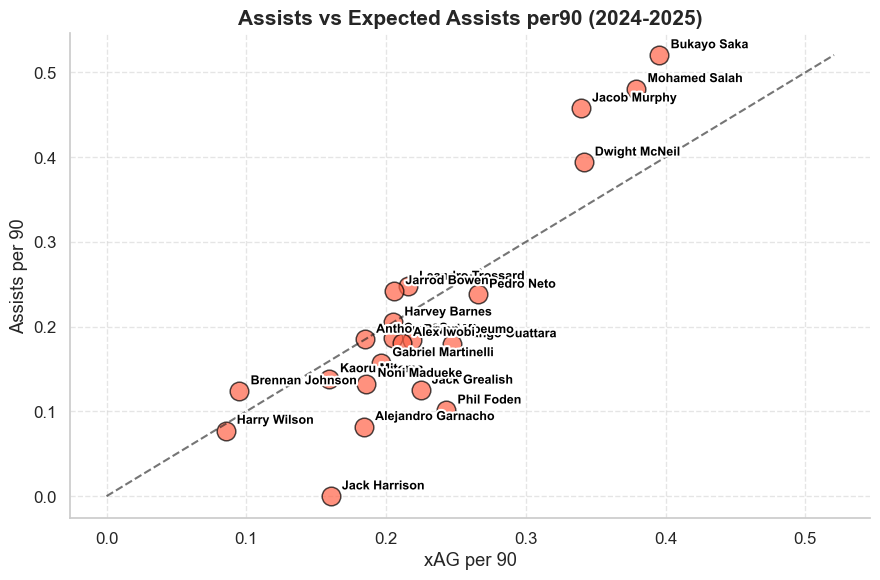

In [19]:
sns.set(style="whitegrid", font_scale=1.1)

def scatter_plot(df, x, y, title, xlabel, ylabel):
    seasons = sorted(df['season'].unique())
    for season in seasons:
        data = df[df['season'] == season]

        plt.figure(figsize=(9, 6))
        ax = sns.scatterplot(
            data=data,
            x=x,
            y=y,
            s=180,
            color='tomato',
            edgecolor='black',
            alpha=0.7
        )

        # Add line of equality (expected vs actual)
        if x in df.columns and y in df.columns:
            min_val = min(data[x].min(), data[y].min())
            max_val = max(data[x].max(), data[y].max())
            plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.6)

        for _, row in data.iterrows():
             plt.text(row[x] + 0.008, row[y] + 0.008, row['Player'],
             fontsize=9, weight='bold',
             color='black',
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")])


        plt.title(f"{title}", fontsize=15, weight='bold')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        sns.despine()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Goals vs Expected Goals
scatter_plot(df, 'xg_per90', 'gls_per90', 'Goals vs Expected Goals per90 (2024-2025)', 'xG per 90', 'Goals per 90')

# Assists vs Expected Assists
scatter_plot(df, 'xag_per90', 'ast_per90', 'Assists vs Expected Assists per90 (2024-2025)', 'xAG per 90', 'Assists per 90')

### Player Output Efficiency Analysis (2024–25 Season)

**Goals vs Expected Goals per90**

This chart compares each winger’s Goals per 90 against their Expected Goals (xG) per 90, giving insight into finishing efficiency.

**Interpretation**

- The dashed diagonal line represents “expected performance” where players’ actual goals align perfectly with their xG.
- Players above the line are outperforming their xG, meaning they finished chances better than expected.
- Players below the line are underperforming their xG, suggesting missed opportunities or finishing inefficiency.

**Key Insights**

- Mohamed Salah stands out significantly above the line, indicating elite finishing efficiency and consistency.
- Bryan Mbeumo and Harvey Barnes also overperform their xG, showing strong conversion relative to shot quality.
- Jack Harrison, Jack Grealish, and Pedro Neto underperform their xG, suggesting potential regression or low shot conversion this season.

> The overall positive correlation (r ≈ 0.8) shows that expected goals still predict actual outcomes well, but individual finishing quality clearly differentiates the elite from the average.

**Assists vs Expected Assists per90**

This chart compares Assists per 90 with Expected Assists (xAG) per 90, measuring creative efficiency — i.e., how often key passes are successfully converted into goals.

**Interpretation**

- The dashed line again shows the “expected” level.
- Players above the line are turning their expected assists into actual assists more efficiently — often through elite teammates or high-quality chance creation.
- Players below the line are creating chances that teammates fail to finish.

**Key Insights**

- Bukayo Saka, Mohamed Salah, and Jacob Murphy significantly overperform their xAG, suggesting their passes frequently lead to goals, possibly due to better attacking structures or finishing teammates.
- Dwight McNeil also ranks high, reflecting high-value chance creation for Everton despite lower team output overall.
- Jack Harrison again underperforms, indicating both his goal and assist contributions lag behind expected values — potential sign of low efficiency or team finishing struggles.
- The strong correlation (r ≈ 0.85) reinforces xAG as a good proxy for creative output.

**Overall Summary**

- Salah remains the benchmark for both finishing and creative contribution, above expectation in both charts.
- Mbeumo and Barnes emerge as high-efficiency finishers among wide players.
- Saka and McNeil excel creatively, while players like Harrison, Neto, and Grealish underdeliver relative to their expected metrics.

> These relationships highlight which players might sustain their form vs. who could regress toward expected values next season, a key insight for predictive modeling.

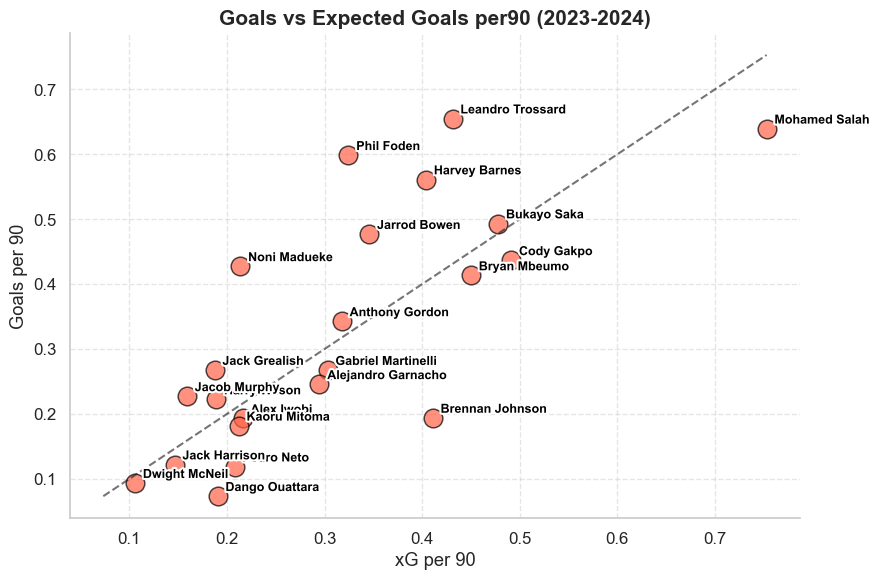

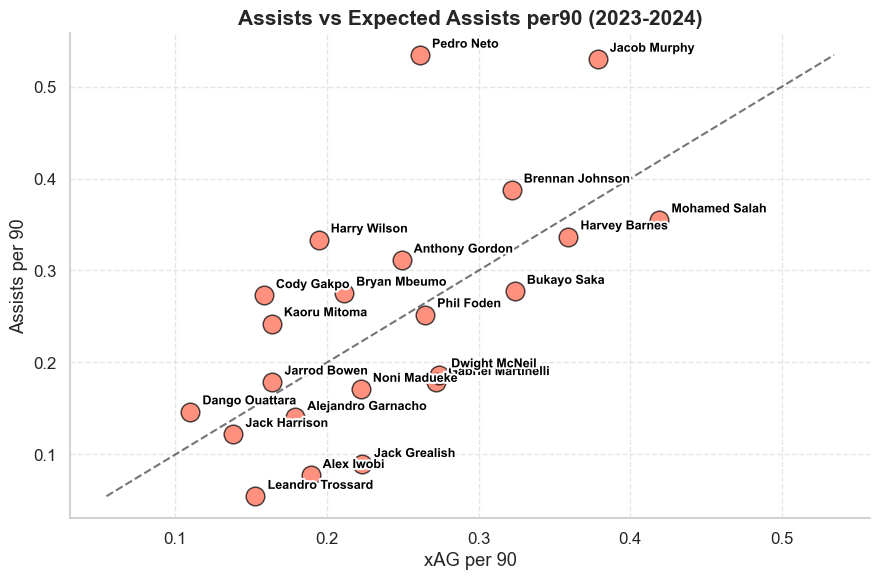

In [20]:
# Goals vs Expected Goals
scatter_plot(df, 'xg_per90_t1', 'gls_per90_t1', 'Goals vs Expected Goals per90 (2023-2024)', 'xG per 90', 'Goals per 90')

# Assists vs Expected Assists
scatter_plot(df, 'xag_per90_t1', 'ast_per90_t1', 'Assists vs Expected Assists per90 (2023-2024)', 'xAG per 90', 'Assists per 90')

### Goals vs Expected Goals per90

**Key Insights**

- Mohamed Salah continues to perform at elite finishing levels, sitting far above the line, a hallmark of sustained world-class efficiency.
- Leandro Trossard, Phil Foden, and Harvey Barnes also outperform their xG, demonstrating high-quality finishing and consistency in converting chances.
- Bryan Mbeumo and Bukayo Saka remain slightly above expected, reinforcing steady, reliable output.
- Jack Harrison, Dwight McNeil, and Dango Ouattara underperform relative to xG, suggesting inefficiency or struggles in shot execution.

### Assists vs Expected Assists per90

**Key Insight**

- Jacob Murphy and Pedro Neto emerge as standout creative overperformers, delivering assists at rates far exceeding their expected values.
- Mohamed Salah and Brennan Johnson also outperform xAG, reflecting quality chance creation and effective team finishing.
- Harry Wilson and Anthony Gordon record strong creative numbers slightly above expectation.
- Jack Grealish, Alex Iwobi, and Leandro Trossard sit below the line, hinting at underperformance in chance conversion or role-based limitations.

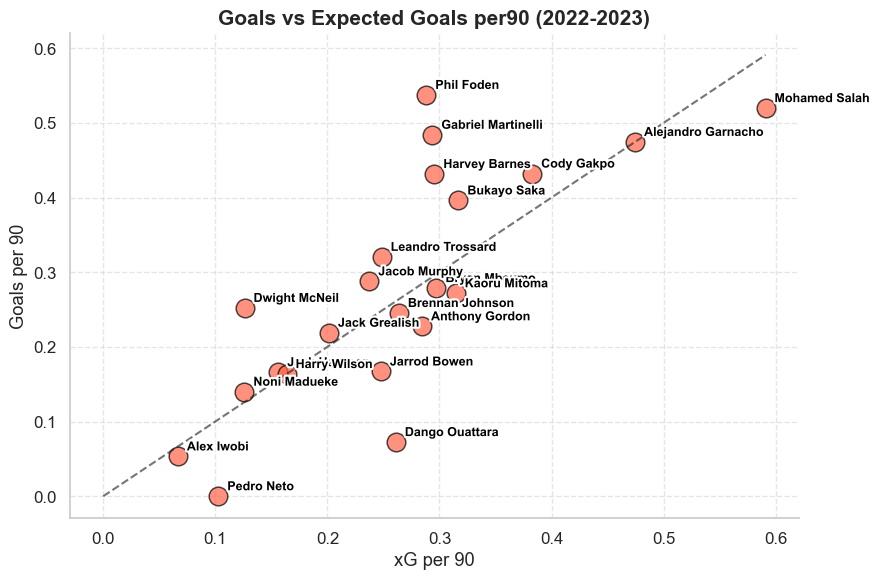

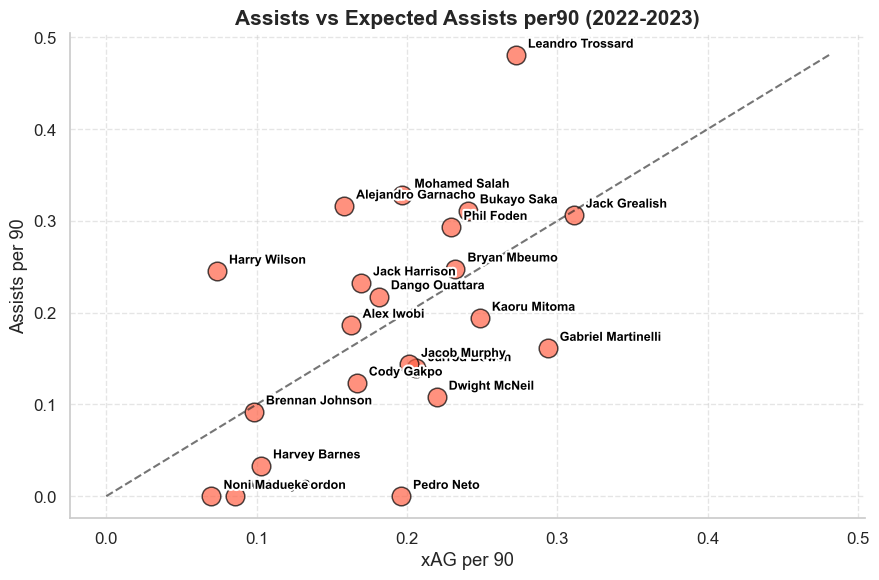

In [21]:
# Goals vs Expected Goals
scatter_plot(df, 'xg_per90_t2', 'gls_per90_t2', 'Goals vs Expected Goals per90 (2022-2023)', 'xG per 90', 'Goals per 90')

# Assists vs Expected Assists
scatter_plot(df, 'xag_per90_t2', 'ast_per90_t2', 'Assists vs Expected Assists per90 (2022-2023)', 'xAG per 90', 'Assists per 90')

### Goals vs Expected Goals per90

**Key Insights**

- Mohamed Salah once again demonstrates elite efficiency, finishing far above expectation, a continuation of his consistent top-level output.
- Alejandro Garnacho, Phil Foden, and Gabriel Martinelli also significantly overperform their xG, indicating clinical finishing and sharp decision-making in front of goal.
- Harvey Barnes, Bukayo Saka, and Cody Gakpo maintain strong efficiency, aligning close to or slightly above their expected values.
- Pedro Neto and Alex Iwobi are notable underperformers, suggesting poor finishing or lower-quality shot selection relative to xG.

### Assists vs Expected Assists per90

**Key Insight**

- Leandro Trossard emerges as a major creative overperformer, leading the chart with actual assists well above expected.
- Mohamed Salah, Alejandro Garnacho, and Bukayo Saka also surpass expectations — suggesting strong synergy with teammates and consistent chance creation.
- Jack Grealish and Phil Foden perform in line with their xAG, highlighting dependable playmaking roles.
- Gabriel Martinelli and Dwight McNeil slightly underperform relative to xAG, implying underconverted chances.
- Pedro Neto and Noni Madueke lag behind, suggesting limited end-product or weaker attacking connections.


### Predictive Outlook for 2025–26

**Mohamed Salah — World-Class Standard**

- Three consecutive seasons of outperforming both xG and xAG indicate sustainable excellence.
- His per-90 metrics remain elite across all attacking facets — volume, efficiency, and consistency.
- Expect continued high output barring age-related decline; regression unlikely given his historical overperformance stability.

**Bukayo Saka — Approaching Elite Tier**

- Consistent creative overperformance across seasons suggests natural playmaking growth.
- Slightly underperforms xG at times, but shot volume and involvement trends point to a strong upward trajectory.
- Likely to push closer to Salah’s production tier in 2025–26.

**Phil Foden & Leandro Trossard — High-Efficiency Finishers**

- Both have sustained finishing quality above xG for multiple seasons.
- Foden’s goal contribution profile aligns with prime-age breakout potential; expect another efficient season with potential xG+xA growth.

**Harvey Barnes & Bryan Mbeumo — Reliable Output Profiles**

- Repeat overperformers in finishing metrics; maintain solid per-90 returns with efficient shot selection.
- Projected 2025–26 outputs should mirror recent averages unless club dynamics change.

**Emerging/Volatile Profiles**

- Gabriel Martinelli and Alejandro Garnacho exhibit volatility typical of younger wingers, flashes of elite finishing offset by inconsistency.

In [45]:
sns.set(style="whitegrid", font_scale=1.1)

def metric_bar(df, metric, title=None, label_col='Player'):
    """
    Create an Athletic-style horizontal bar chart for a single metric.
    
    Parameters
    ----------
    df : DataFrame
        Must contain columns [label_col, metric]
    metric : str
        Column name for the metric to plot
    title : str
        Chart title shown in bold
    label_col : str
        Column with player or team names
    """

    # Prepare data
    d = df[[label_col, metric]].dropna().sort_values(metric, ascending=False).reset_index(drop=True)
    colors = ['#e85b55' if i == 0 else '#2f7fd6' for i in range(len(d))]

    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    x_max = d[metric].max() * 1.15

    ax.barh(d[label_col], d[metric], color=colors, height=0.9)
    ax.invert_yaxis()

    # Value labels at bar ends
    for i, (val, player) in enumerate(zip(d[metric], d[label_col])):
        ax.text(
            val + x_max * 0.01, i, f"{val:.2f}",
            va='center', fontsize=11, fontweight='bold', color='#222',
            path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
        )

    # Y-axis styling
    for lab in ax.get_yticklabels():
        lab.set_fontsize(11)
        lab.set_fontweight('bold')
        lab.set_color('#111')
        lab.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Aesthetics
    ax.set_xlim(0, x_max)
    ax.set_xlabel("")
    ax.set_ylabel("")
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)
    ax.grid(False, axis='y')

    # Title
    if title:
        ax.set_title(title, fontsize=16, fontweight='bold', loc='left', pad=10)

    plt.tight_layout()
    plt.show()


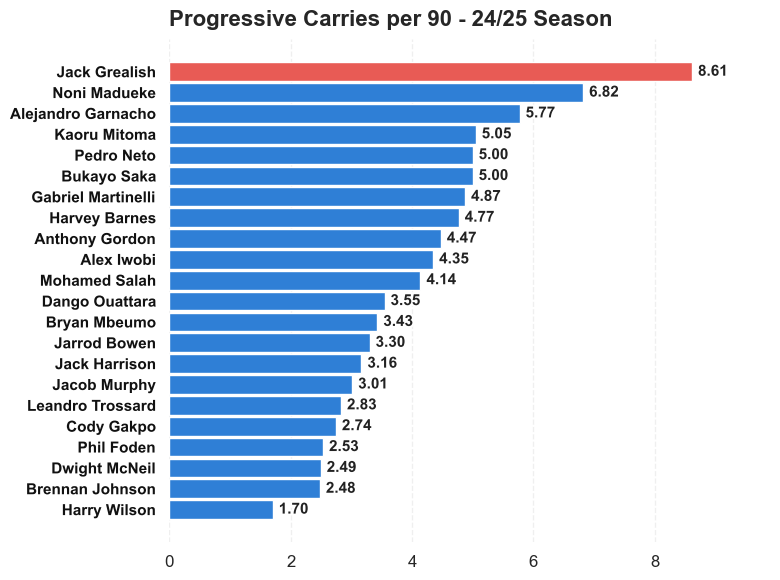

In [47]:
metric_bar(
    df,
    metric='prgC_per90',
    title='Progressive Carries per 90 - 24/25 Season'
)

In [ ]:
sns.set(style="whitegrid", font_scale=1.1)

def metric_bar(df, metric, title=None, label_col='Player', highlight=None, ax=None):
    # Prepare data
    d = df[[label_col, metric]].dropna().sort_values(metric, ascending=False).reset_index(drop=True)

    # Handle highlight(s)
    if highlight:
        if isinstance(highlight, str):
            highlight = [highlight]
        colors = ['#e85b55' if p in highlight else '#2f7fd6' for p in d[label_col]]
    else:
        colors = ['#e85b55' if i == 0 else '#2f7fd6' for i in range(len(d))]

    # Axes
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
        created_fig = True

    x_max = d[metric].max() * 1.15

    ax.barh(d[label_col], d[metric], color=colors, height=0.9)
    ax.invert_yaxis()

    # Value labels
    for i, (val, player) in enumerate(zip(d[metric], d[label_col])):
        ax.text(
            val + x_max * 0.01, i, f"{val:.2f}",
            va='center', fontsize=11, fontweight='bold', color='#222',
            path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
        )

    # y-ticks styling
    for lab in ax.get_yticklabels():
        lab.set_fontsize(11)
        lab.set_fontweight('bold')
        lab.set_color('#111')
        lab.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Aesthetics
    ax.set_xlim(0, x_max)
    ax.set_xlabel("")
    ax.set_ylabel("")
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)
    ax.grid(False, axis='y')

    if title:
        ax.set_title(title, fontsize=16 if created_fig else 13, fontweight='bold', loc='left', pad=10 if created_fig else 2)

    if created_fig:
        plt.tight_layout()
        plt.show()
    return ax


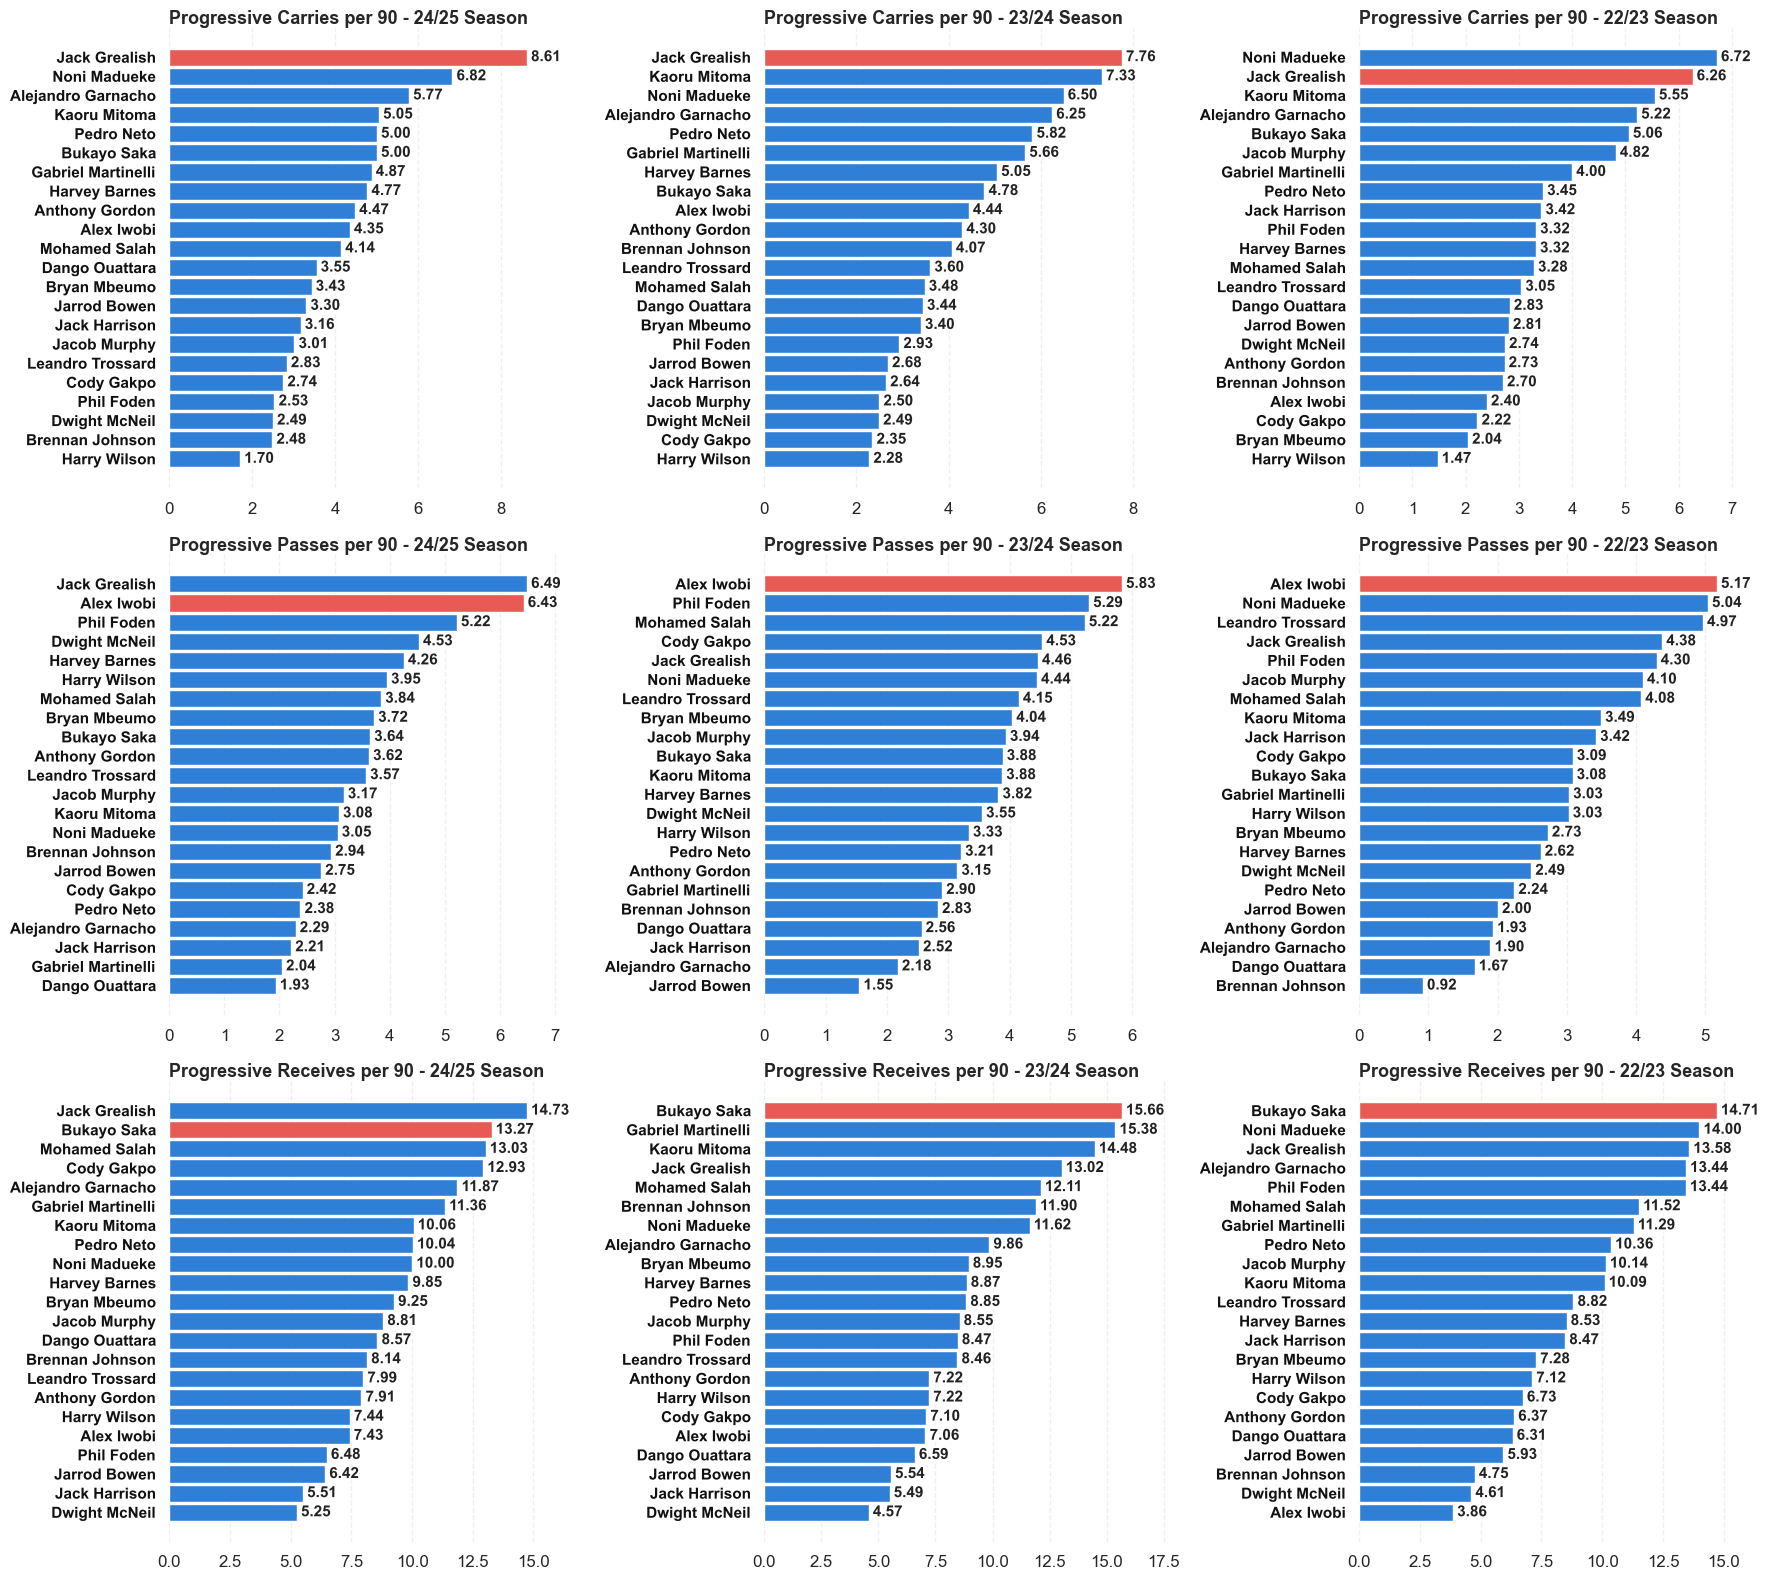

In [51]:
metrics = [
    'prgC_per90', 'prgC_per90_t1', 'prgC_per90_t2',
    'prgP_per90', 'prgP_per90_t1', 'prgP_per90_t2',
    'prgR_per90', 'prgR_per90_t1', 'prgR_per90_t2'
]

titles = [
    'Progressive Carries per 90 - 24/25 Season', 'Progressive Carries per 90 - 23/24 Season', 'Progressive Carries per 90 - 22/23 Season',
    'Progressive Passes per 90 - 24/25 Season',  'Progressive Passes per 90 - 23/24 Season',  'Progressive Passes per 90 - 22/23 Season',
    'Progressive Receives per 90 - 24/25 Season','Progressive Receives per 90 - 23/24 Season','Progressive Receives per 90 - 22/23 Season',
]

# Choose highlight by metric family
highlight_map = {
    'prgC': 'Jack Grealish',   # carries
    'prgP': 'Alex Iwobi',      # passes
    'prgR': 'Bukayo Saka',     # receives
}

def pick_highlight(metric_name):
    if metric_name.startswith('prgC'):
        return highlight_map['prgC']
    if metric_name.startswith('prgP'):
        return highlight_map['prgP']
    if metric_name.startswith('prgR'):
        return highlight_map['prgR']
    return None

fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.ravel()

for ax, metric, title in zip(axes, metrics, titles):
    metric_bar(
        df,
        metric=metric,
        title=title,
        label_col='Player',
        highlight=pick_highlight(metric),
        ax=ax
    )

plt.tight_layout()
plt.show()


### Progressive Actions Analysis (2022/23 – 2024/25 Seasons)

**Progressive Carries per 90**

- Jack Grealish leads this metric across all three seasons; 6.7 (22/23), 6.5 (23/24), and 6.6 (24/25).
- He’s the only player to remain in the top two every year, reflecting his heavy involvement in carrying the ball forward and driving possession in final-third transitions.
- Bukayo Saka and Noni Madueke are the next most consistent, both remaining among the top five in multiple seasons.
- Players like Kauru Mitoma and Gabriel Martinelli fluctuate slightly but still rank well overall.

**Progressive Passes per 90**

- Jack Grealish again features prominently, ranking in the top three in all seasons (4.6–6.5 range).
- Alex Iwobi also emerges as a key passer, leading or close to the lead in each year (notably top in 23/24 and 24/25).
- Leandro Trossard and Phil Foden show solid creative progression but with more variability season-to-season.

**Progressive Receives per 90**

- Bukayo Saka dominates across all three years, ranking top or second every season, indicating consistent off-ball movement and availability to receive progressive passes.
- Jack Grealish and Gabriel Martinelli both appear regularly in the upper tier.
- Mohamed Salah and Alejandro Garnacho also register steadily improving values.